<a href="https://colab.research.google.com/github/killisai-ram/Movie_Reviews_Sentiment_Analysis/blob/main/Movie_review_Model_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I have the dataset of 1000 reviews. The next step is preprocessing the data. So, we have to clean up the data. If there are any unwanted or missing data, we have to do the preprocessing of the data. Once the data is preprocessed, we will be creating a model.

So here we will create Logistic Regression Model. Logistic Regression is a statistical analysis method to predict a binary outcome such as yes/no, based on the prior observations of the dataset. Logistic Regression classifies the data whether it is positive or negative.

Once we create the model, we have to train the model with the preprocessed data. 80% of the data will be used to train the model, and the remaining 20% will be used to test the model.

Once we are satisfied with the evaluation of the model in the testing phase, we are going to save the model and deploy it as a web app.

Tools for this project -

NLTK - python library for NLP processing.

Sci-kit learn - this library contains Logistic Regression model.

WordCloud - This libray draw a graphical representation of the words in that particular document.

Matplotlib - to draw charts.

Numpy - to perform a wide variety of mathematical operations on arrays.

Pandas - It has functions for analyzing, cleaning, exploring, and manipulating data.

Streamlit - To deploy this machine learning model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [2]:
from google.colab import files
files.upload()

Saving Movie_Review.csv to Movie_Review.csv


{'Movie_Review.csv': b'text,sentiment\r\n"My daughter liked it but I was aghast, that a character in this movie smokes. As if it isn\'t awful enough to see ""product placement"" actors like Bruce Willis who smoke in their movies - at least children movies should be more considerate! I wonder: was that intentional? Did big tobacco ""sponsor"" the film? What does it take to ban smoking from films? At least films intended for children and adolescents. My daughter liked it but I was aghast, that a character in this movie smokes. As if it isn\'t awful enough to see ""product placement"" actors like Bruce Willis who smoke in their movies - at least children movies should be more considerate! I wonder: was that intentional? Did big tobacco ""sponsor"" the film? What does it take to ban smoking from films? At least films intended for children and adolescents.",neg\r\n"I... No words. No words can describe this. I will try for the sake of those few brave people who stick knives into their toaste

In [3]:
!ls

Movie_Review.csv  sample_data


In [4]:
data = pd.read_csv('Movie_Review.csv')

In [5]:
data

,text,sentiment
0,"My daughter liked it but I was aghast, that a ...",neg
1,I... No words. No words can describe this. I w...,neg
2,this film is basically a poor take on the old ...,neg
3,"This is a terrible movie, and I'm not even sur...",neg
4,First of all this movie is a piece of reality ...,pos
...,...,...
995,"""Campfire Tales"" is basically made up of three...",pos
996,I just saw this film at the phoenix film festi...,pos
997,It's out of question that the real Anna Anders...,pos
998,Michelle Pfeiffer stars as a mob widow who see...,pos


In [6]:
data.dropna(inplace=True)
# statement is used to remove rows with missing (NaN) values in a dataset.

In [7]:
# we don't have any missing values

# lets do some clean up in the text.
# we might be having some kind of stopwords will be there..
# which are not going to give much context about the data..
# lets remove those stopwords from here.

In [10]:
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

# we are checking each and every word in this review..
# we are splitting it up and we are converting it into the lower case and we are checking that lower case word should not be part of the stopwords in English language

In [12]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
# now lets apply it to the entire data.

data['text'] = data['text'].apply(clean_review)

In [14]:
data['text']

,text
0,"daughter liked aghast, character movie smokes...."
1,I... words. words describe this. try sake brav...
2,film basically poor take old urban legend baby...
3,"terrible movie, I'm even sure terrible. ugly, ..."
4,First movie piece reality well realized artist...
...,...
995,"""Campfire Tales"" basically made three spooky s..."
996,saw film phoenix film festival today loved it....
997,question real Anna Anderson Princess Anastasia...
998,Michelle Pfeiffer stars mob widow seeks normal...


In [15]:
# create a wordcloud
# it will print all the words in the document in a image
# but it won't print all the words in the doc in a different size,
# based on the number of times that particular word has been repeated in the document.
# if the font is bigger, the word has been repeated more number of times in the document.

# now lets draw the word cloud for the negative sentiment records.

from wordcloud import WordCloud

In [17]:
# draw WordCloud
# first take all the words in negative reviews

reviews = ' '.join(word for word in data['text'][data['sentiment'] == 'neg'].astype(str))

# here, we are taking each and every word in the reviews, where the sentiment = negative

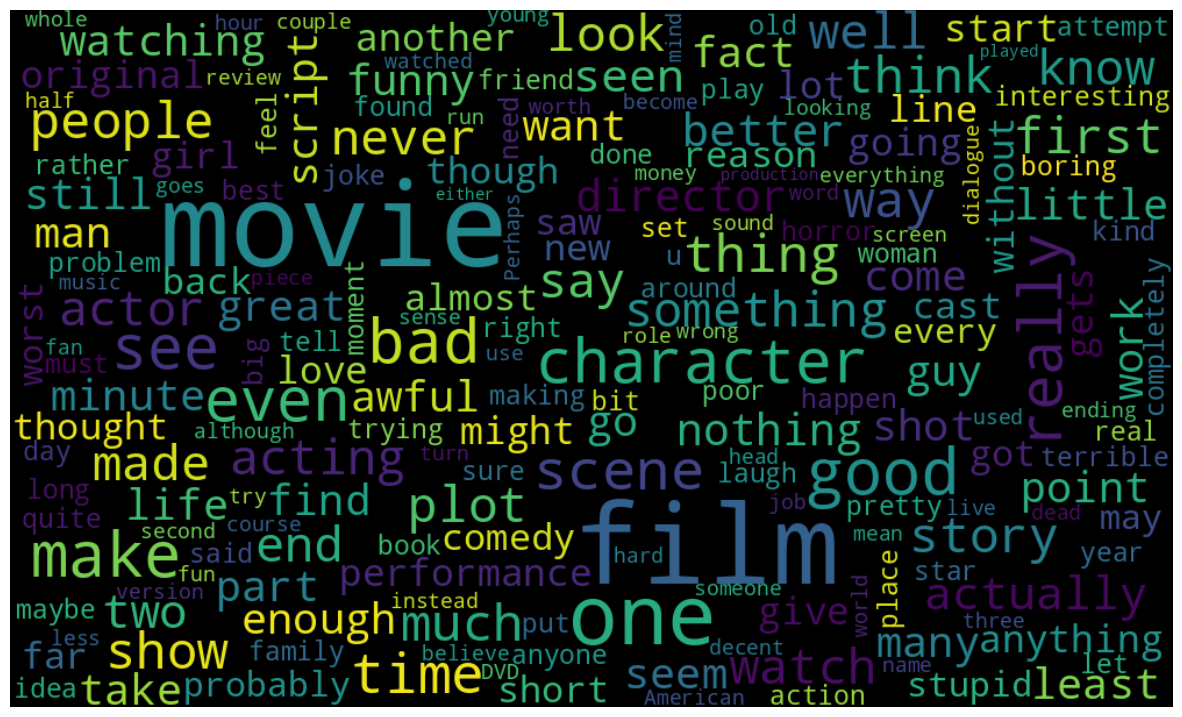

In [18]:
# lets create an object for the wordcloud

wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

# WordCloud: A class from the wordcloud library that creates a word cloud visualization.
# height=600 and width=1000: Define the dimensions (in pixels) of the word cloud image.
# max_font_size=100: Sets the maximum font size for the most frequent words, ensuring that larger words do not dominate the visualization entirely.

# wordcloud.generate(reviews): Generates the word cloud using the text data in the variable reviews,
# The text in reviews is processed, and the frequency of each word determines its size in the visualization.

# plt.figure(figsize=(15,12)): Creates a new figure with a size of 15 inches by 12 inches for the plot.
# plt.imshow(...): Displays the word cloud image created by WordCloud.
# interpolation='bilinear': Smooths the displayed image, making the visualization more visually appealing.
# plt.axis('off'): Removes the axes to focus attention entirely on the word cloud image.  plt.show(): Displays the figure containing the word cloud

In [ ]:
reviews = ' '.join(word for word in data['text'][data['sentiment']== 'pos'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

# data['text'][data['sentiment'] == 'pos']: Filters rows in the dataset data where the sentiment is positive ('pos').
# astype(str): Ensures the filtered text data is treated as strings (in case the data contains other types, such as NaN).
# ' '.join(word for word in ...): Joins all the positive reviews into a single string, with each review separated by a space.
# This single string is stored in the reviews variable and is used to create the word cloud.

In [ ]:
# now we have all this text data, but the model we are going to use here is Logistic Regression.
# LR works on statistical data. So we have to convert text data into numerical data. Then we'll feed into our model

# "tfid vectorizer" converts text data into numerical format.
# import it from sklearm

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [20]:
reviews = cv.fit_transform(data['text']).toarray()

# now our reviews are converted into the numerical format.

In [21]:
# in the same way lets convert positive and negative of the sentiment also in numerical values.

data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])

<ipython-input-21-6a2263123a26>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])


In [22]:
data['sentiment'].value_counts()

,count
sentiment,
0,500
1,500


In [23]:
data

,text,sentiment
0,"daughter liked aghast, character movie smokes....",0
1,I... words. words describe this. try sake brav...,0
2,film basically poor take old urban legend baby...,0
3,"terrible movie, I'm even sure terrible. ugly, ...",0
4,First movie piece reality well realized artist...,1
...,...,...
995,"""Campfire Tales"" basically made three spooky s...",1
996,saw film phoenix film festival today loved it....,1
997,question real Anna Anderson Princess Anastasia...,1
998,Michelle Pfeiffer stars mob widow seeks normal...,1


In [24]:
# now our data is ready, lets create a model from it.

from sklearn.linear_model import LogisticRegression

# imports the LogisticRegression class from the linear_model module of the scikit-learn library.
# This class is used to implement logistic regression, a statistical method used for binary or multiclass classification problems.
# Logistic regression is a machine learning algorithm used to predict a categorical outcome (e.g., binary: yes/no, spam/not spam, or multiclass problems).

In [25]:
model = LogisticRegression()

In [ ]:
# now we have to do the splitting. 80% of data into training dataset and 20% into test dataset.

In [26]:
from sklearn.model_selection import train_test_split

# imports the train_test_split function from the model_selection module of the scikit-learn library.
# This function is used to split datasets into training and testing subsets, a critical step in machine learning workflows to evaluate model performance.


In [27]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

# we have done data splitting
# reviews: Likely a collection of text data (features) representing the reviews.
# data['sentiment']: The target variable (labels), indicating the sentiment associated with each review (e.g., positive, negative).
# test_size=0.2:Specifies that 20% of the dataset will be allocated to the testing set. The remaining 80% will be used for training.

In [28]:
# now we have to feed data into our model.

model.fit(reviews_train,sent_train)

LogisticRegression()

In [ ]:
# Now our model has been created

In [29]:
# Now lets predict the values with our model

predict = model.predict(reviews_test)

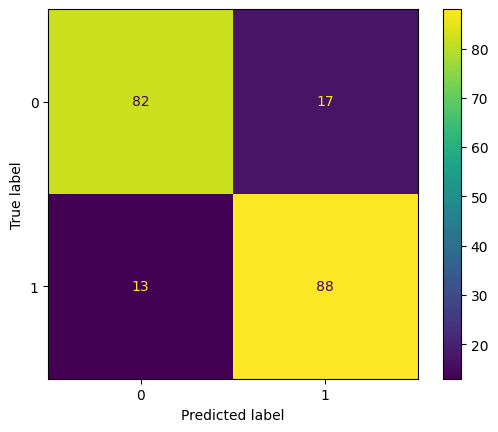

In [30]:
# lets check how accurately our model is working

# confusion_matrix will give us insights how many times our model had predicted correctly and how many times our model had predicted wrongly.

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

# sent_test: The true labels (ground truth) from the testing set.predict: The predicted labels produced by the model on the testing set.
# labels=model.classes_: Specifies the order of labels/classes to align predictions and ground truth. Ensures the confusion matrix rows and columns correspond to model.classes_.
# The confusion matrix cm is a 2D array where: Rows: Represent the actual classes. Columns: Represent the predicted classes.
# Each element cm[i][j] indicates how often instances of class i were classified as class j.

In [31]:
# If you take values as 0 and 0 hereby,
# 82 values are the false values.
# But 17 negative reviews are treated as positive reviews by our model.
# 88 actual positive reviews are predicted our model as positive reviews.
# 13 actual positive reviews are predicted our model as negative reviews.

In [32]:
# lets export this model and create a web application

import pickle as pk

In [35]:
pk.dump(model,open('model.pkl','wb'))

In [34]:
pk.dump(cv,open('scaler.pkl','wb'))

In [36]:
import pickle as pk

# Load the model
loaded_model = pk.load(open('model.pkl', 'rb'))

# Load the vectorizer/scaler
loaded_vectorizer = pk.load(open('scaler.pkl', 'rb'))

# The loaded_model and loaded_vectorizer can now be used for predictions.